In [ ]:
#logistic regression describes the relationship between the dependent binary
# variable and one or more independent variable/s.

In [ ]:
# This is a dataset of 40 canditates results, our goal is to build a logistic regression model in 
# order to determine whether candidates would get admitted to a prestigious university.

In [ ]:
                           INTRODUCTION

#Logistic Regression Model where the dependent variable represents whether a person gets admitted and
#the three independeny variable are the Gmat scores, Gpa and the years of working experience.
# y = 'Admitted', x = 'Gmat, Gpa, Work_Experience'

In [3]:
#importing packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from patsy import dmatrices
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
dt = pd.read_csv("C:\\Users\\user\\Documents\\student.csv",header=0)
dt


,Gmat,Gpa,Work_Experience,Admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


In [5]:
# building dataframes to capture the data
canditates = {'Gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,
                      590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,
                      590,690],
              'Gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,
                      3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'Work_Experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,
                                  4,6,5,1,2,1,4,5],
              'Admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,
                           0,0,0,1]}
            

df = pd.DataFrame(dt,columns= ['Gmat', 'Gpa','Work_Experience','Admitted'])
print (df)

    Gmat  Gpa  Work_Experience  Admitted
0    780  4.0                3         1
1    750  3.9                4         1
2    690  3.3                3         0
3    710  3.7                5         1
4    680  3.9                4         0
5    730  3.7                6         1
6    690  2.3                1         0
7    720  3.3                4         1
8    740  3.3                5         1
9    690  1.7                1         0
10   610  2.7                3         0
11   690  3.7                5         1
12   710  3.7                6         1
13   680  3.3                4         0
14   770  3.3                3         1
15   610  3.0                1         0
16   580  2.7                4         0
17   650  3.7                6         1
18   540  2.7                2         0
19   590  2.3                3         0
20   620  3.3                2         1
21   600  2.0                1         0
22   550  2.3                4         0
23   550  2.7   

In [6]:
# creating a logistic model
X = df[['Gmat', 'Gpa','Work_Experience']]
y = df['Admitted']

In [7]:
#train_test split
#30% of the dataset is will be for model testing while 70% of the data will be for model training
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [8]:
#applying the regression model
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy:  0.75


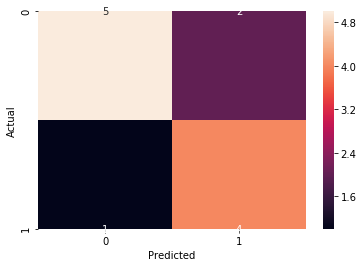

In [9]:
# getting confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

In [10]:
# observation from the matrix:

#TP = True Positives = 5
#TN = True Negatives = 4
#FP = False Positives = 1
#FN = False Negatives = 2

In [11]:
#You can then also get the Accuracy using:

#Accuracy = (TP+TN)/Total = (5+4)/12 = 0.75

#The accuracy is therefore 75% for the test set.

In [12]:
# the test size set was 30% of our data set, the confusion matrix will display for 12 records
#(0.30*40) hence the 12 records.

In [13]:
print (X_test) #test dataset
print (y_pred) #predicted values

    Gmat  Gpa  Work_Experience
22   550  2.3                4
20   620  3.3                2
25   670  3.3                6
4    680  3.9                4
10   610  2.7                3
15   610  3.0                1
28   650  3.7                6
11   690  3.7                5
18   540  2.7                2
29   660  3.3                5
27   580  2.3                2
35   650  2.3                1
[1 0 1 1 0 0 1 1 0 1 0 0]


In [14]:
# from our result, where 1=admitted and 0= rejected
# the actual_admitted = [0,1,1,0,0,0,1,1,0,1,0,0]
#the predicted_admitted=[1,0,1,1,0,0,1,1,0,1,0,0]

In [15]:
#In the actual dataset (from step-1), you’ll see that for the test data,
#we got the correct results 9 out of 12 times.
#this matches the accuracy level of 75%

In [16]:
#Checking the Prediction for a New Set of Data
# having a  new dataset of 12 candidates

In [17]:
dt2 = pd.read_csv("C:\\Users\\user\\Documents\\cand.csv", header=0)
dt2

,Gmat,Gpa,Work_Experience
0,590,2.0,3
1,740,3.7,4
2,680,3.3,6
3,610,2.3,1
4,710,3.0,5
5,670,2.7,3
6,700,2.4,2
7,690,3.8,4
8,520,3.2,3
9,640,2.8,3


In [18]:
# using existing logistic regression model to predict whether the new candidates will get admitted.

In [19]:
new_candidates = {'Gmat': [590,740,680,610,710,670,700,690,520,640,760,650],
                  'Gpa': [2,3.7,3.3,2.3,3,2.7,2.4,3.8,3.2,2.8,3.3,2.9],
                  'Work_Experience': [3,4,6,1,5,3,2,4,3,3,1,5]
                  }

dt2 = pd.DataFrame(new_candidates,columns= ['Gmat', 'Gpa','Work_Experience'])

In [20]:
dt2 = pd.DataFrame(new_candidates,columns= ['Gmat', 'Gpa','Work_Experience'])
y_pred=logistic_regression.predict(dt2)

In [21]:
print (dt2)
print (y_pred)

    Gmat  Gpa  Work_Experience
0    590  2.0                3
1    740  3.7                4
2    680  3.3                6
3    610  2.3                1
4    710  3.0                5
5    670  2.7                3
6    700  2.4                2
7    690  3.8                4
8    520  3.2                3
9    640  2.8                3
10   760  3.3                1
11   650  2.9                5
[0 1 1 0 1 0 0 1 1 0 0 1]


In [22]:
                      CONCLUSION
#from the result gotten from the prediction of the new data, it can be seen that, 
#six candidates are not expected to be admitted, while the other sixcandidates are expected to be
#admitted.

NameError: name 'CONCLUSION' is not defined

In [ ]:
#Poisson regression is used to predict a dependent variable that consists of "count data" given one
#ormore independent variables. The variable we want to predict is called the dependent variable 
#(or sometimes the response, outcome, target or criterion variable).

In [ ]:
#As a data scientist working in an HR firm, you have been provided
#with recruitment data of previous applicants. Your firm wants to
#know the factors that affect being hired. Variables such as Gender,
#reading score , maths score and status of the application of
#previous candidates were provided.

In [29]:
# importing dataset
dt = pd.read_csv("C:\\Users\\user\\Documents\\sample.csv",header=0)
dt


,Gender,Read,Write,Math,Status
0,0,57,52,41,0
1,1,68,59,53,0
2,0,44,33,54,0
3,0,63,44,47,0
4,0,47,52,57,0
...,...,...,...,...,...
195,1,55,59,52,0
196,1,42,46,38,0
197,1,57,41,57,0
198,1,55,62,58,1


In [38]:
# fitting in GLM poisson regression model
formula = "Status ~ Gender+Read+Write+Math"
response, predictors = dmatrices(formula, dt, return_type='dataframe')
po_results = sm.GLM(response, predictors, family=sm.families.Poisson()).fit()
print(po_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Status   No. Observations:                  200
Model:                            GLM   Df Residuals:                      195
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -65.946
Date:                Sat, 03 Jul 2021   Deviance:                       33.892
Time:                        11:53:21   Pearson chi2:                     31.6
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.2679      2.722     -7.078      0.0

In [ ]:
# the p-value of the Gender,Read and Math which are greater than 0.05 indicates the acception of the
#null hypothesis while that of Write indicates that Write has a  statistical significant effect on
# the response variable the rejection of the null value.

In [ ]:
#from the result we got,the ratio of pearson chi2 / Df residual which is approximately 0.2, for 
#observed data, a ratio less than 1 implies underdispersion.Data that is underdispered requires a
#zero-inflated model.

In [31]:
import statsmodels.formula.api as smf

In [32]:
#calculating dispersion 
def ct_response(row):
    "Calculate response observation for Cameron-Trivedi dispersion test"
    y = row['Status']
    m = row['Status_mu']
    return ((y -- m)**2 -- y) / m

In [33]:
ct_data = dt.copy()
ct_data['Status_mu'] = po_results.mu
ct_data['ct_resp'] = ct_data.apply(ct_response, axis=1)
# Linear regression of auxiliary formula
ct_results = smf.ols('ct_resp ~ Status_mu -- 1', ct_data).fit()

In [34]:
# Construct confidence interval for alpha, the coefficient of Status_mu
alpha_ci95 = ct_results.conf_int(0.05).loc['Status_mu']
print('\nC-T dispersion test: alpha = {:5.3f}, 95% CI = ({:5.3f}, {:5.3f})'
.format(ct_results.params[0], alpha_ci95.loc[0], alpha_ci95.loc[1]))


C-T dispersion test: alpha = 0.514, 95% CI = (3.538, 4.849)


In [ ]:
                            CONCLUSION
    ## the p-value of 0.514 depicts acceptance of null hypothesis,A 95% confidence interval of (3.538
  #  4.849) is the range of values that contains 95% of the true mean of the population.this show that
# the data set is underdispersed so a Zero-inflated model is recommended for this data set.